In [101]:
city_data = []

In [102]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#packed the lats and longitudes as pairs by zipping them lat_lngs with the zip function
#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple

In [104]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [105]:
from citipy import citipy

In [106]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [107]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [108]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20e73e8e8a29d3892529196cdfb4c564


In [109]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [110]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | suleja
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | woodward
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | narsaq
Processing Record 9 of Set 1 | morro bay
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | montepuez
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | hambantota
Processing Record 18 of Set 1 | sao gabriel da cachoeira
Processing Record 19 of Set 1 | yashkino
Processing Record 20 of Set 1 | bouafle
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | pue

Processing Record 35 of Set 4 | ponto novo
Processing Record 36 of Set 4 | wanlaweyn
Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | denia
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | riyadh
Processing Record 42 of Set 4 | suzu
City not found. Skipping...
Processing Record 43 of Set 4 | wattegama
Processing Record 44 of Set 4 | manokwari
Processing Record 45 of Set 4 | deputatskiy
Processing Record 46 of Set 4 | svetlogorsk
Processing Record 47 of Set 4 | azua
Processing Record 48 of Set 4 | keetmanshoop
Processing Record 49 of Set 4 | lakes entrance
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | groningen
Processing Record 2 of Set 5 | kalemie
Processing Record 3 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 5 | tawang
Proce

Processing Record 27 of Set 8 | katsuura
Processing Record 28 of Set 8 | shirokiy
Processing Record 29 of Set 8 | morant bay
Processing Record 30 of Set 8 | forssa
Processing Record 31 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 32 of Set 8 | selma
Processing Record 33 of Set 8 | chengde
Processing Record 34 of Set 8 | bandipur
Processing Record 35 of Set 8 | sorland
Processing Record 36 of Set 8 | waipawa
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | villazon
Processing Record 40 of Set 8 | sampit
Processing Record 41 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 8 | san quintin
Processing Record 43 of Set 8 | manhush
Processing Record 44 of Set 8 | longlac
City not found. Skipping...
Processing Record 45 of Set 8 | nyurba
Processing Record 46 of Set 8 | santa isabel do rio negro
Processing Record 47 of Set 8 | bereda
Processing Record 48 of Set 8 | terra santa
Proces

Processing Record 12 of Set 12 | alamogordo
Processing Record 13 of Set 12 | velyka kisnytsya
City not found. Skipping...
Processing Record 14 of Set 12 | lalibela
Processing Record 15 of Set 12 | lokachi
Processing Record 16 of Set 12 | chulman
Processing Record 17 of Set 12 | paradwip
City not found. Skipping...
Processing Record 18 of Set 12 | mahibadhoo
Processing Record 19 of Set 12 | san policarpo
Processing Record 20 of Set 12 | monrovia
Processing Record 21 of Set 12 | ahome
Processing Record 22 of Set 12 | kalavad
Processing Record 23 of Set 12 | jiddah
City not found. Skipping...
Processing Record 24 of Set 12 | sakakah
Processing Record 25 of Set 12 | zonalnoye
City not found. Skipping...
Processing Record 26 of Set 12 | meyungs
City not found. Skipping...
Processing Record 27 of Set 12 | rosetta
Processing Record 28 of Set 12 | bourges
Processing Record 29 of Set 12 | kalomo
City not found. Skipping...
Processing Record 30 of Set 12 | pemba
Processing Record 31 of Set 12 | 

In [169]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Suleja,9.1758,7.1808,91.40,18,8,6.91,NG,2021-03-28 20:18:07
1,Hilo,19.7297,-155.0900,71.60,83,75,8.05,US,2021-03-28 20:13:11
2,Georgetown,5.4112,100.3354,78.80,94,20,1.14,MY,2021-03-28 20:14:07
3,Woodward,36.4337,-99.3904,66.20,24,1,5.75,US,2021-03-28 20:18:08
4,New Norfolk,-42.7826,147.0587,51.01,62,67,1.01,AU,2021-03-28 20:18:08
5,Provideniya,64.3833,-173.3000,11.55,91,100,22.03,RU,2021-03-28 20:18:08
6,Ribeira Grande,38.5167,-28.7000,60.80,82,40,12.66,PT,2021-03-28 20:18:08
7,Narsaq,60.9167,-46.0500,24.80,58,0,2.30,GL,2021-03-28 20:18:09
8,Morro Bay,35.3658,-120.8499,75.99,34,0,6.33,US,2021-03-28 20:14:45
9,Lagoa,39.0500,-27.9833,59.27,81,100,21.27,PT,2021-03-28 20:18:09


In [112]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity","Cloudiness", "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [113]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Suleja,NG,2021-03-28 20:18:07,9.1758,7.1808,91.40,18,8,6.91
1,Hilo,US,2021-03-28 20:13:11,19.7297,-155.0900,71.60,83,75,8.05
2,Georgetown,MY,2021-03-28 20:14:07,5.4112,100.3354,78.80,94,20,1.14
3,Woodward,US,2021-03-28 20:18:08,36.4337,-99.3904,66.20,24,1,5.75
4,New Norfolk,AU,2021-03-28 20:18:08,-42.7826,147.0587,51.01,62,67,1.01
5,Provideniya,RU,2021-03-28 20:18:08,64.3833,-173.3000,11.55,91,100,22.03
6,Ribeira Grande,PT,2021-03-28 20:18:08,38.5167,-28.7000,60.80,82,40,12.66
7,Narsaq,GL,2021-03-28 20:18:09,60.9167,-46.0500,24.80,58,0,2.30
8,Morro Bay,US,2021-03-28 20:14:45,35.3658,-120.8499,75.99,34,0,6.33
9,Lagoa,PT,2021-03-28 20:18:09,39.0500,-27.9833,59.27,81,100,21.27


In [114]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [115]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

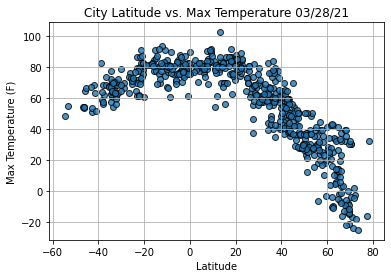

In [116]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

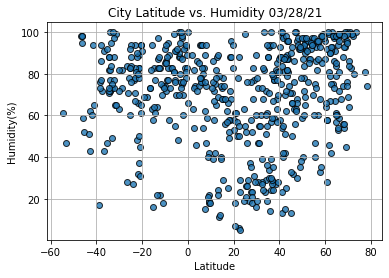

In [117]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

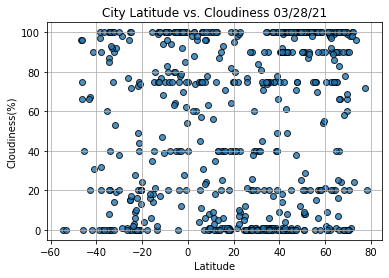

In [118]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

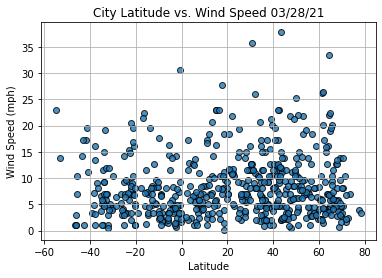

In [119]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [141]:
 # Import linregress
from scipy.stats import linregress
    
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [123]:
index13 = city_data_df.loc[13]
index13

#The output will present all the information at index 13 of the city_data_df DataFrame.

City                      Ushuaia
Country                        AR
Date          2021-03-28 20:15:59
Lat                         -54.8
Lng                         -68.3
Max Temp                     48.2
Humidity                       61
Cloudiness                      0
Wind Speed                  23.02
Name: 13, dtype: object

In [131]:
city_data_df["Lat"] >= 0
#we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0,

0       True
1       True
2       True
3       True
4      False
       ...  
572    False
573     True
574    False
575     True
576     True
Name: Lat, Length: 577, dtype: bool

In [132]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Suleja,NG,2021-03-28 20:18:07,9.1758,7.1808,91.40,18,8,6.91
1,Hilo,US,2021-03-28 20:13:11,19.7297,-155.0900,71.60,83,75,8.05
2,Georgetown,MY,2021-03-28 20:14:07,5.4112,100.3354,78.80,94,20,1.14
3,Woodward,US,2021-03-28 20:18:08,36.4337,-99.3904,66.20,24,1,5.75
5,Provideniya,RU,2021-03-28 20:18:08,64.3833,-173.3000,11.55,91,100,22.03


In [137]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Suleja,NG,2021-03-28 20:18:07,9.1758,7.1808,91.40,18,8,6.91
1,Hilo,US,2021-03-28 20:13:11,19.7297,-155.0900,71.60,83,75,8.05
2,Georgetown,MY,2021-03-28 20:14:07,5.4112,100.3354,78.80,94,20,1.14
3,Woodward,US,2021-03-28 20:18:08,36.4337,-99.3904,66.20,24,1,5.75
5,Provideniya,RU,2021-03-28 20:18:08,64.3833,-173.3000,11.55,91,100,22.03


In [138]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,New Norfolk,AU,2021-03-28 20:18:08,-42.7826,147.0587,51.01,62,67,1.01
11,Montepuez,MZ,2021-03-28 20:18:09,-13.1256,38.9997,69.33,97,100,4.88
13,Ushuaia,AR,2021-03-28 20:15:59,-54.8000,-68.3000,48.20,61,0,23.02
16,Sao Gabriel Da Cachoeira,BR,2021-03-28 20:18:10,-0.1303,-67.0892,89.60,66,40,3.44
19,Rikitea,PF,2021-03-28 20:18:11,-23.1203,-134.9692,79.14,71,6,15.43


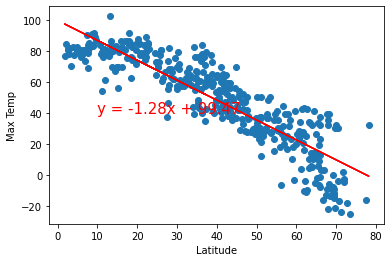

In [154]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

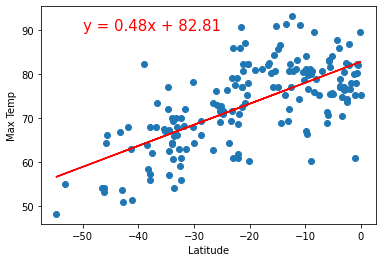

In [157]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

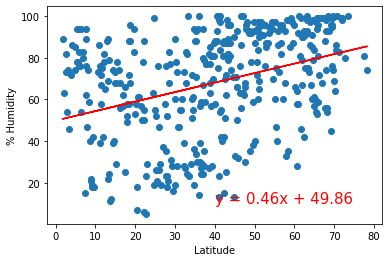

In [158]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

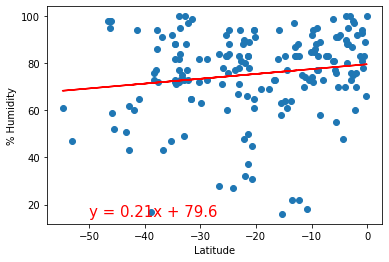

In [160]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

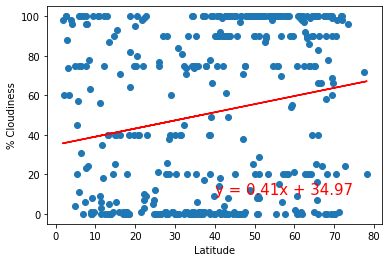

In [161]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

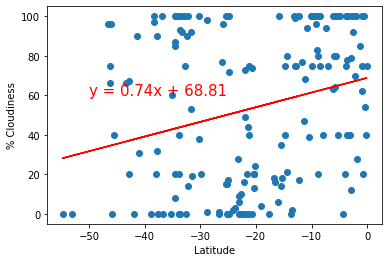

In [163]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

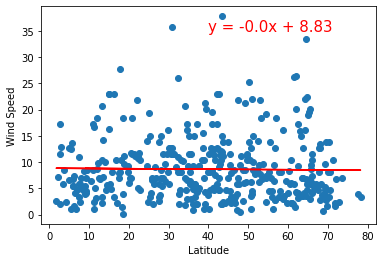

In [165]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

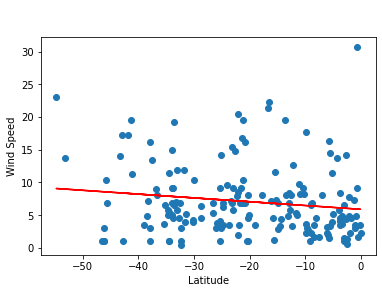

In [166]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: invalid syntax (<ipython-input-167-0d3fab778bf5>, line 1)